In [2]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

news=[]
url='https://news.naver.com/'
response = urllib.request.urlopen(url)
soup=BeautifulSoup(response,'html.parser')
results=soup.select('.section_list_ranking li a')
for result in results:
    #print('제목:',result.attrs['title'])
    #print('링크:',result.attrs['href'])
    title=result.attrs['title']
    href=result.attrs['href']
    url_content='https://news.naver.com'+result.attrs['href']
    response_content = urllib.request.urlopen(url_content)
    soup_content=BeautifulSoup(response_content,'html.parser')
    content=soup_content.select_one('#articleBodyContents')
    #print(content.contents)

    #가공작업
    output=''
    for item in content.strings:
        stripped = str(item).strip()    #공백제거
        if stripped=='':
            continue
        else:
             output+=item
    output=output.replace('본문 내용TV플레이어','')
    output=output.replace('// flash 오류를 우회하기 위한 함수 추가','')
    output=output.replace('function _flash_removeCallback() {}','')
    output=output.strip()
    news.append({'title':title,'href':href,'contents':output})
    
#print(news)    
dataframe=pd.DataFrame(news)
dataframe.to_csv("news.csv", index=False)

In [3]:
df = pd.read_csv('news.csv', engine='python', encoding='utf-8')

In [4]:
sample_title = df['title'][:2]
sample_title

0              탄핵 발의된 추미애 또 부동산 발언 "문재인 정부탓 아냐"
1    "한 번도 경험해보지 못한 나라, 국민들은 '이생집망' 절규" 주호영의 외침
Name: title, dtype: object

In [7]:
sample_content = df['contents'][:2]
sample_content

0    "부동산이 서민 인생 저당잡는 경제시스템이 문제"[한국경제TV 김현경 기자]추미애 ...
1    미래통합당 주호영 원내대표가 21일 국회 본회의에서 교섭단체 대표연설을 하고 있다....
Name: contents, dtype: object

In [5]:
df.shape

(60, 3)

In [25]:
import re
p = '.*(문재인).*'
topic = df[df['title'].str.match(p)|df['contents'].str.match(p)]
topic.shape

(7, 3)

In [9]:
topic.head()

,title,href,contents
1,"""한 번도 경험해보지 못한 나라, 국민들은 '이생집망' 절규"" 주호영의 외침",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,미래통합당 주호영 원내대표가 21일 국회 본회의에서 교섭단체 대표연설을 하고 있다....
6,"8월17일 임시공휴일 지정…文대통령 ""국민께 작은 위로되길""(종합)",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,국무회의서 8월17일 월요일 임시공휴일 지정8월 15일부터 17일까지 사흘 연휴생산...
7,8월17일 임시공휴일 확정…광복절부터 사흘연휴,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,국무회의 주재하는 문 대통령(서울=연합뉴스) 김주성 기자 = 문재인 대통령이 21일...
10,"""한 달 몇천만원씩 벌었는데…"" 코로나 6개월에 '초토화'",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,코로나 6개월 [BC+AC] 1편▽ '사상 초유' 개학 연기·원격 수업에 ▽ 학생 ...
11,어쩐지 쇠 맛 나더라…후추 속 이 가루 정체는?,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,"인류의 넘버원 향신료, 후추후추는 예전부터 '향신료의 왕'으로 대접을 받았습니다. ..."


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

stopwords_kr = ['있었다','것이다']

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(font_path = 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenB.ttf',
                         background_color=backgroundcolor,
                         width=width, height=height).generate(data)
    print(wordcloud.words_)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

{'있다': 1.0, '있는': 0.4945054945054945, '있습니다': 0.4175824175824176, '대한': 0.2967032967032967, '기자': 0.2967032967032967, '것으로': 0.2857142857142857, '지난': 0.2857142857142857, '하는': 0.27472527472527475, '코로나19': 0.27472527472527475, '밝혔다': 0.23076923076923078, 'co kr': 0.2087912087912088, '한다': 0.1978021978021978, '위해': 0.1978021978021978, '따르면': 0.1978021978021978, '갤럭시': 0.1978021978021978, '재배포 금지': 0.1978021978021978, '21일': 0.18681318681318682, '문재인': 0.18681318681318682, '이번': 0.17582417582417584, '경우': 0.17582417582417584, '통해': 0.17582417582417584, '미국': 0.17582417582417584, '많은': 0.16483516483516483, '때문에': 0.16483516483516483, '하고': 0.15384615384615385, '이날': 0.15384615384615385, '대통령': 0.15384615384615385, '된다': 0.15384615384615385, '위한': 0.15384615384615385, '다른': 0.15384615384615385, '이런': 0.14285714285714285, '없는': 0.14285714285714285, '가운데': 0.14285714285714285, '유충이': 0.14285714285714285, '마스크 착용': 0.14285714285714285, '우리': 0.13186813186813187, '것은': 0.13186813186813187, '않

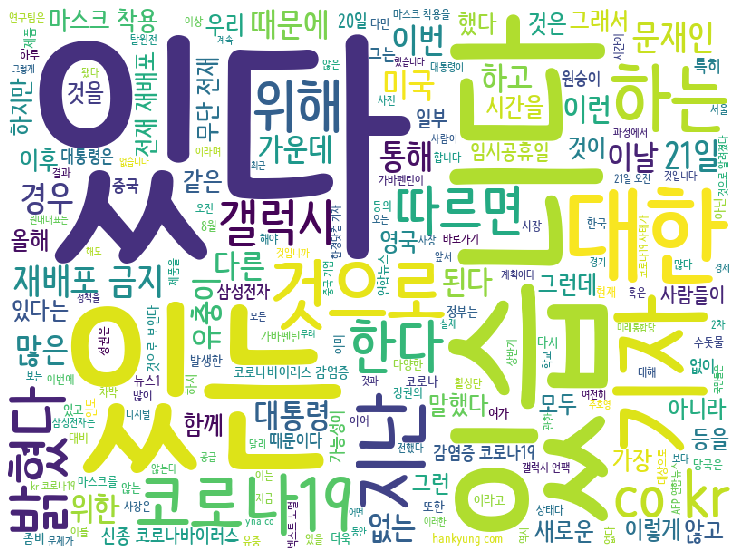

In [15]:
displayWordCloud(' '.join(topic['contents']))

In [16]:
from soynlp.noun import NewsNounExtractor

In [27]:
%%time
noun_extractor = NewsNounExtractor(verbose=True)
noun_extractor.train(topic['contents']) 
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus based logistic predictor
C:/ProgramData/Anaconda3/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (6497, 4119, 2405)
predicting noun score was done                                        
before postprocessing 667
_noun_scores_ 198
checking hardrules ... doneNsubJ (떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 104
extracted 0 compounds from eojeolsWall time: 51.9 ms


{'경제': 1.0, '국회': 1.0, '탄핵소추안': 1.0, '공정': 1.0, '부동산': 1.0, '정책': 1.0, '주인공': 1.0, '집값': 1.0, '상승': 1.0, '정부': 1.0, '일찍': 1.0, '토건세력': 1.0, '낙찰': 1.0, '담보': 1.0, '저축은행': 1.0, '아파트': 1.0, '부지': 1.0, '스토리': 1.0, '사람': 1.0, '가격': 1.0, '내리기': 1.0, '네이버': 1.0, '미래통합당': 1.0, '본회의': 1.0, '대표연설': 1.0, '정권': 1.0, '전체': 1.0, '전체주': 1.0, '권력': 1.0, '권력분립': 1.0, '법치주의': 1.0, '지금': 1.0, '부정': 1.0, '단체장들': 1.0, '총장': 1.0, '문제': 1.0, '나라': 1.0, '국민들': 1.0, '분노': 1.0, '평등': 1.0, '여성': 1.0, '가치': 1.0, '가치들': 1.0, '제대': 1.0, '수사': 1.0, '과정': 1.0, '관리': 1.0, '비정규직': 1.0, '기회': 1.0, '법무부장관': 1.0, '검찰총장': 1.0, '핍박': 1.0, '시장': 1.0, '판결': 1.0, '민주당': 1.0, '실상': 1.0, '위선': 1.0, '목소리': 1.0, '대통령': 1.0, '상황에서': 1.0, '국가': 1.0, '대책': 1.0, '내용': 1.0, '여당': 1.0, '죽음': 1.0, '하루': 1.0, '최고': 1.0, '부채': 1.0, '세대': 1.0, '2년': 1.0, '국회의장': 1.0, '있습니다': 1.0, '반대': 1.0, '협치': 1.0, '없습니다': 1.0, '규명': 1.0, '마련': 1.0, '대법원장': 1.0, '안보': 1.0, '확대': 1.0, '발표': 1.0, '국무회의': 1.0, '임시공휴일': 1.0, '지정': 1.0, '15일': 1.0, '17일': 1.0

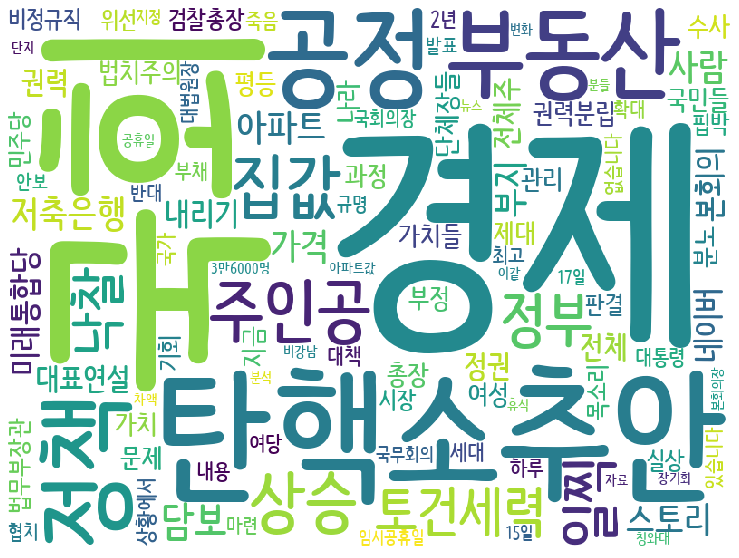

Wall time: 713 ms


In [28]:
%%time
displayWordCloud(' '.join(nouns))